In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import missingno as msno

In [30]:
sample_data = pd.read_csv('training_dataset.psv', sep ='|')

In [31]:
sample_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [33]:
df = sample_data['SepsisLabel'].value_counts()
df

0    1336657
1      25015
Name: SepsisLabel, dtype: int64

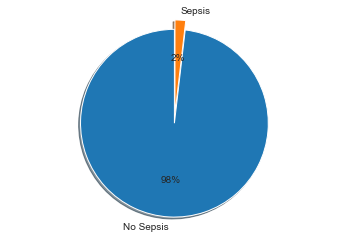

In [34]:
no_sepsis_percent = (df[0]/(df[0]+df[1]))*100
sepsis_percent = (df[1]/(df[0]+df[1]))*100

labels = 'No Sepsis', 'Sepsis'
sizes = [no_sepsis_percent, sepsis_percent]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.0f%%', shadow=True, startangle = 90)
ax1.axis('equal')


plt.show()

In [35]:
missing_data = sample_data.isnull().sum()
missing_data

HR                   130133
O2Sat                175676
Temp                 902590
SBP                  199680
MAP                  165134
DBP                  459960
Resp                 198043
EtCO2               1319201
BaseExcess          1277998
HCO3                1297001
FiO2                1236770
pH                  1258514
PaCO2               1279813
SaO2                1311871
AST                 1339842
BUN                 1265550
Alkalinephos        1340093
Calcium             1283397
Chloride            1292412
Creatinine          1277512
Bilirubin_direct    1359132
Glucose             1138773
Lactate             1323998
Magnesium           1272850
Phosphate           1304990
Potassium           1231945
Bilirubin_total     1341905
TroponinI           1350388
Hct                 1235350
Hgb                 1258251
PTT                 1317887
WBC                 1272210
Fibrinogen          1352505
Platelets           1279609
Age                       0
Gender              

In [41]:
missing_percent = (missing_data/sample_data.shape[0])*100
missing_percent

HR                   9.556854
O2Sat               12.901492
Temp                66.285420
SBP                 14.664324
MAP                 12.127296
DBP                 33.779060
Resp                14.544105
EtCO2               96.880967
BaseExcess          93.855055
HCO3                95.250618
FiO2                90.827306
pH                  92.424167
PaCO2               93.988347
SaO2                96.342658
AST                 98.396824
BUN                 92.940884
Alkalinephos        98.415257
Calcium             94.251553
Chloride            94.913606
Creatinine          93.819363
Bilirubin_direct    99.813465
Glucose             83.630493
Lactate             97.233254
Magnesium           93.476990
Phosphate           95.837324
Potassium           90.472963
Bilirubin_total     98.548329
TroponinI           99.171313
Hct                 90.723023
Hgb                 92.404852
PTT                 96.784468
WBC                 93.429989
Fibrinogen          99.326784
Platelets 

<AxesSubplot:>

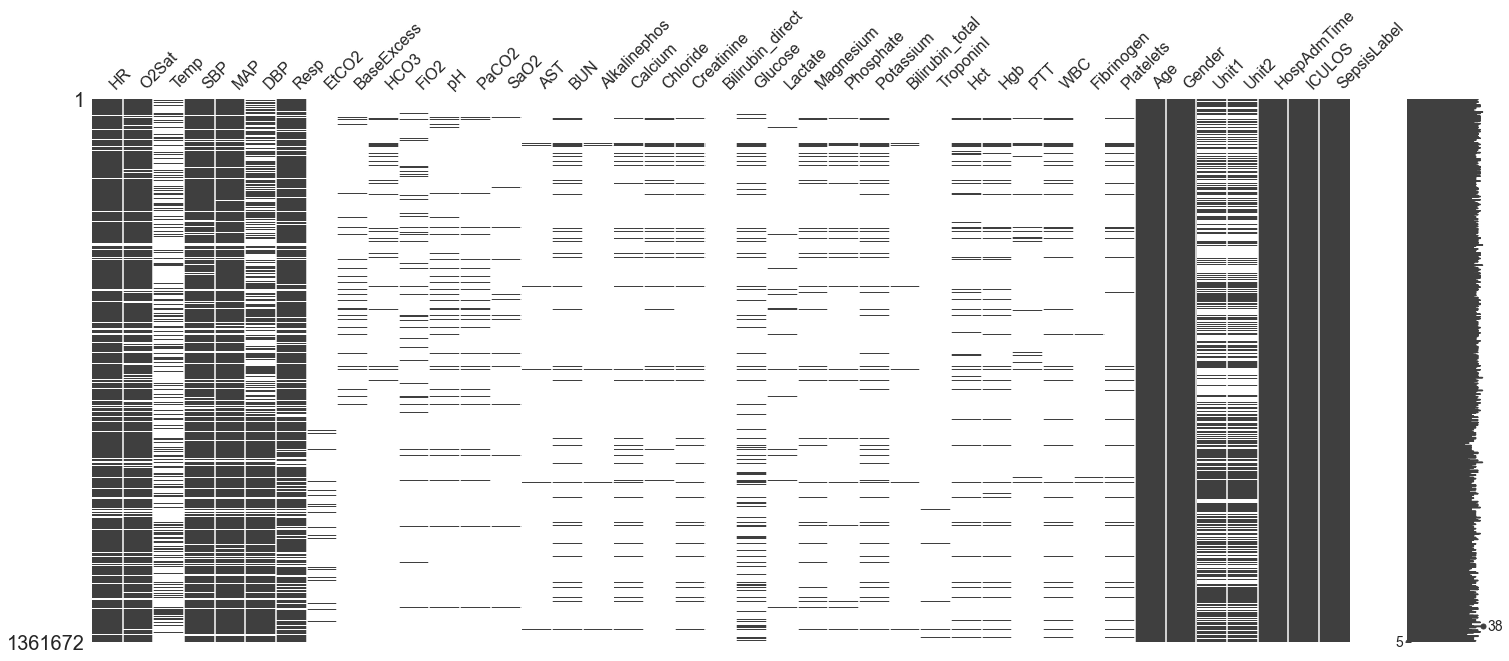

In [42]:
msno.matrix(sample_data)

<AxesSubplot:>

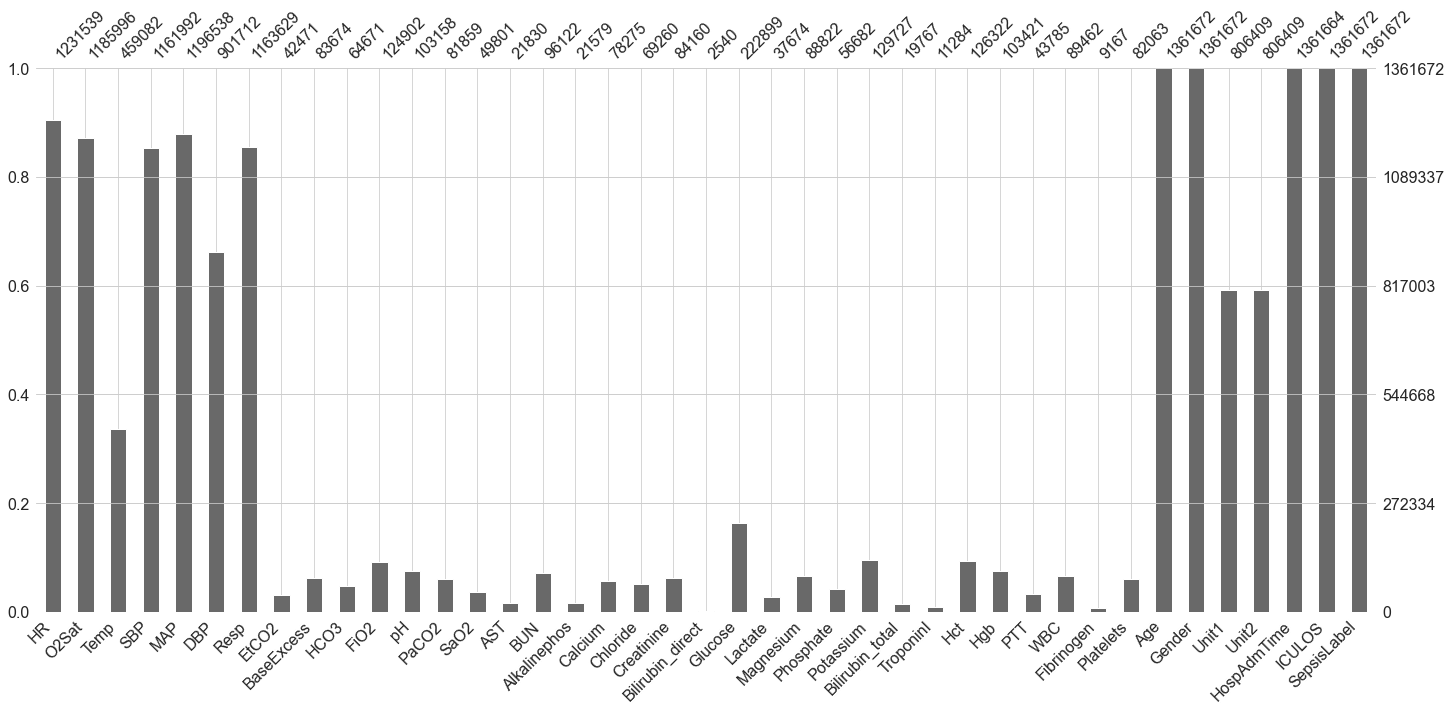

In [39]:
msno.bar(sample_data)

<AxesSubplot:>

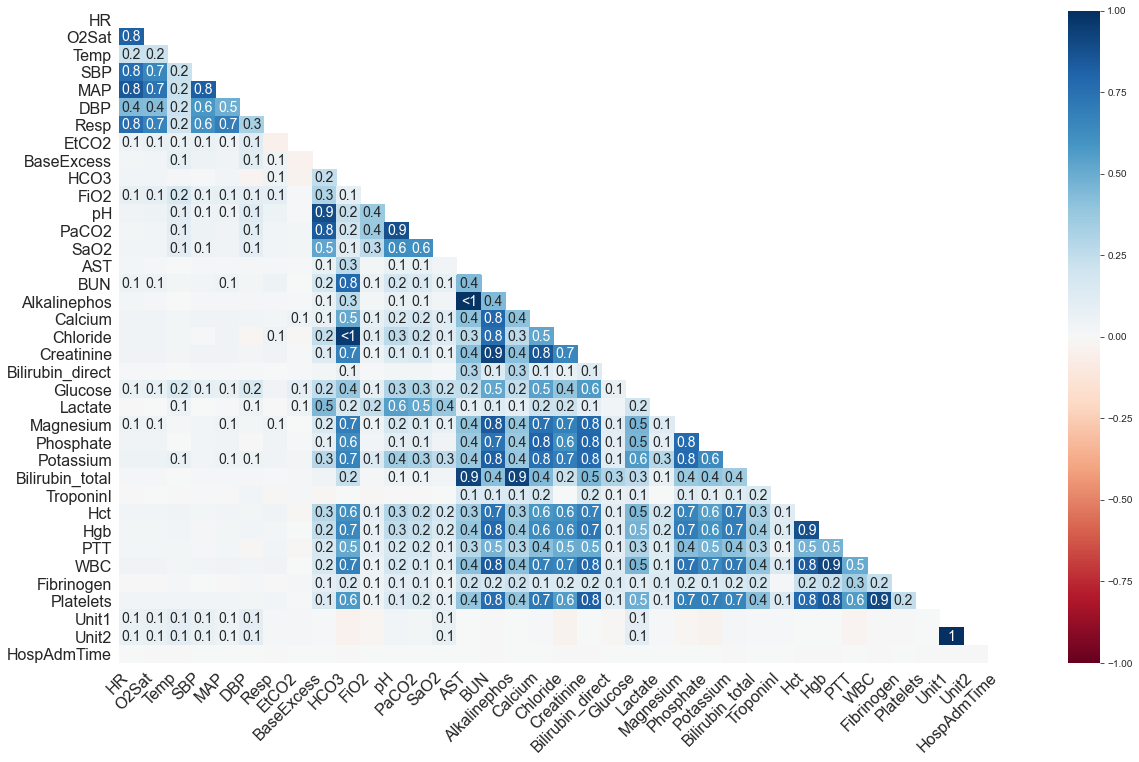

In [44]:
msno.heatmap(sample_data)

C:\Users\Bulbul\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


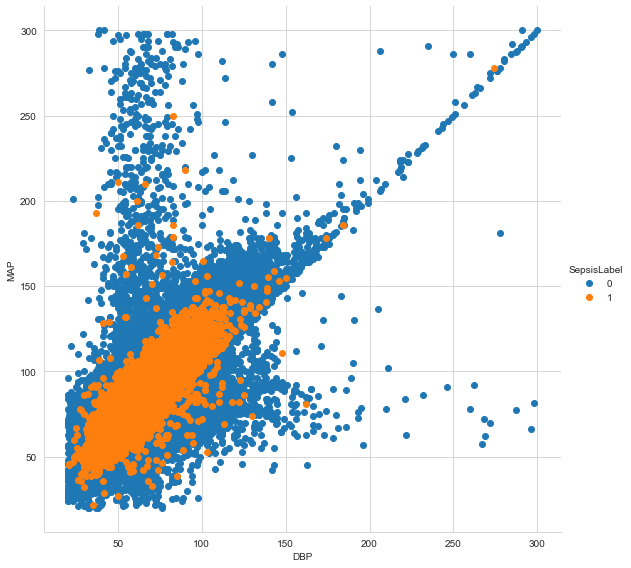

In [49]:
sns.set_style('whitegrid')
sns.FacetGrid(sample_data, hue='SepsisLabel', size=8) \
 .map(plt.scatter, 'DBP', 'MAP') \
 .add_legend();
plt.show();

In [19]:
new_cols = list(missing_percent[missing_percent < 92].index)

In [45]:
sepsis_data = sample_data[new_cols]

In [21]:
new_missing_data = sepsis_data.isnull().sum()
new_missing_percent = (new_missing_data/sepsis_data.shape[0])*100
new_missing_percent

HR              9.556854
O2Sat          12.901492
Temp           66.285420
SBP            14.664324
MAP            12.127296
DBP            33.779060
Resp           14.544105
FiO2           90.827306
Glucose        83.630493
Potassium      90.472963
Hct            90.723023
Age             0.000000
Gender          0.000000
Unit1          40.778029
Unit2          40.778029
HospAdmTime     0.000588
ICULOS          0.000000
SepsisLabel     0.000000
dtype: float64

In [50]:
new_df = sepsis_data['SepsisLabel'].value_counts()
new_df

0    1336657
1      25015
Name: SepsisLabel, dtype: int64

<AxesSubplot:>

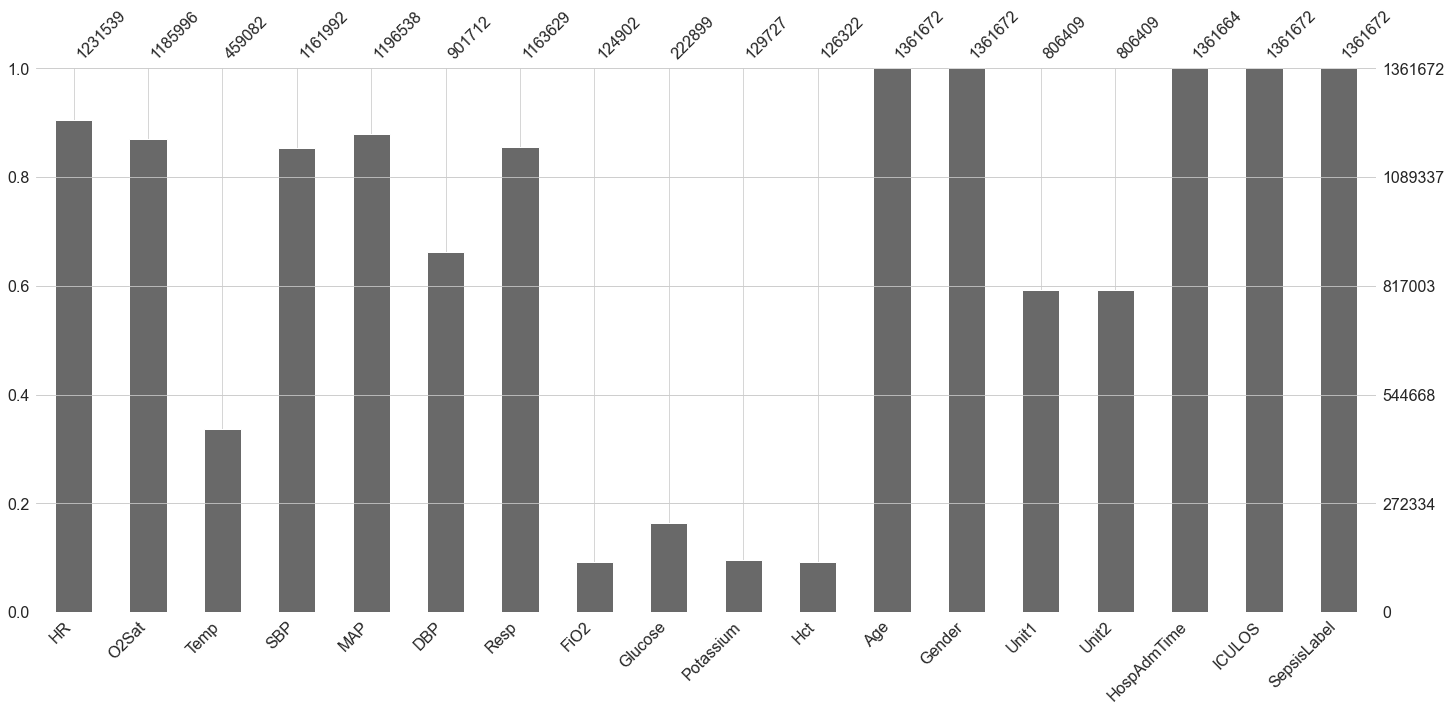

In [51]:
msno.bar(sepsis_data)

In [24]:
sepsis_data.describe(include = 'all')

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,1.231539e+06,1.185996e+06,459082.000000,1.161992e+06,1.196538e+06,901712.000000,1.163629e+06,124902.000000,222899.000000,129727.000000,126322.000000,1.361672e+06,1.361672e+06,806409.000000,806409.000000,1.361664e+06,1.361672e+06,1.361672e+06
mean,8.463807e+01,9.720677e+01,36.981409,1.233876e+02,8.187102e+01,63.398324,1.873328e+01,0.555864,136.638112,4.139130,30.767546,6.215126e+01,5.624284e-01,0.498618,0.501382,-5.522790e+01,2.707650e+01,1.837080e-02
std,1.728354e+01,2.941111e+00,0.770547,2.302735e+01,1.620716e+01,13.853230,5.149755e+00,11.320101,51.442553,0.639772,5.381143,1.635856e+01,4.960876e-01,0.499998,0.499998,1.634700e+02,2.913055e+01,1.342882e-01
min,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,20.000000,1.000000e+00,-50.000000,10.000000,1.000000,5.500000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00
25%,7.200000e+01,9.600000e+01,36.500000,1.065000e+02,7.050000e+01,54.000000,1.500000e+01,0.400000,106.000000,3.700000,27.100000,5.200000e+01,0.000000e+00,0.000000,0.000000,-4.489000e+01,1.100000e+01,0.000000e+00
50%,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,62.000000,1.800000e+01,0.500000,126.000000,4.100000,30.250000,6.400000e+01,1.000000e+00,0.000000,1.000000,-5.500000e+00,2.100000e+01,0.000000e+00
75%,9.600000e+01,9.950000e+01,37.500000,1.380000e+02,9.100000e+01,71.000000,2.200000e+01,0.600000,153.000000,4.400000,34.000000,7.434000e+01,1.000000e+00,1.000000,1.000000,-3.000000e-02,3.400000e+01,0.000000e+00
max,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,300.000000,1.000000e+02,4000.000000,988.000000,27.500000,71.700000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00


In [26]:
demo_data = sepsis_data.dtypes == object

#demo_data['Age'] = True
demo_data['Unit1'] = True
demo_data['Unit2'] = True
demo_data['Gender'] = True
#demo_data['ICULOS'] = True

demo_data

HR             False
O2Sat          False
Temp           False
SBP            False
MAP            False
DBP            False
Resp           False
FiO2           False
Glucose        False
Potassium      False
Hct            False
Age            False
Gender          True
Unit1           True
Unit2           True
HospAdmTime    False
ICULOS         False
SepsisLabel    False
dtype: bool

In [52]:
demo_list = list(demo_data[demo_data].index)

C:\Users\Bulbul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bulbul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bulbul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


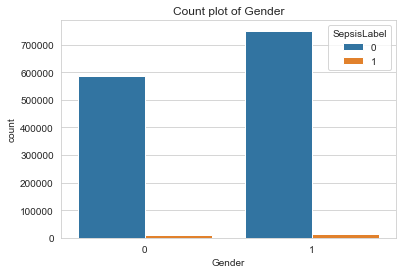

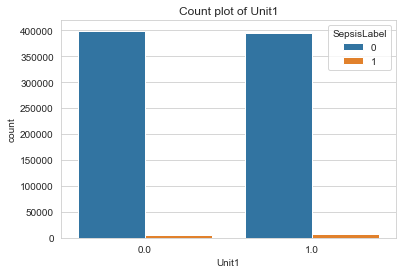

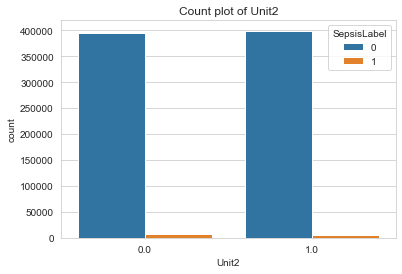

In [53]:

for i,var in enumerate(demo_list):
    plt.figure(i)
    plt.title("Count plot of " + str(var))
    sns.countplot(sepsis_data[var].dropna(), hue='SepsisLabel', data= sepsis_data);